In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px

In [40]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


Pregnancies — количество беременностей.

Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

BloodPressure — диастолическое артериальное давление (мм рт. ст.).

SkinThickness — толщина кожной складки трицепса (мм).

Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).

BMI — индекс массы тела $$(\frac{вес\ в\ кг}{(рост\ в\ м)^2})$$

DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

Age — возраст.

Outcome — наличие диабета (0 — нет, 1 — да).

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
 9   Gender                    778 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.9+ KB


In [84]:
# Добавляем столбец Id
diabetes['Id'] = range(1, len(diabetes) + 1)

# Сортируем по столбцу Id
diabetes = diabetes.sort_values(by='Id').reset_index(drop=True)

# Выводим результат
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6       98             58             33      190  34.0   
1            2      112             75             32        0  35.7   
2            2      108             64              0        0  30.8   
3            8      107             80              0        0  24.6   
4            7      136             90              0        0  29.9   

   DiabetesPedigreeFunction  Age  Outcome  Gender  Id  
0                     0.430   43        0  Female   1  
1                     0.148   21        0  Female   2  
2                     0.158   21        0  Female   3  
3                     0.856   34        0  Female   4  
4                     0.210   50        0  Female   5  


In [85]:
# Перемещаем столбец Id в начало
columns = ['Id'] + [col for col in diabetes.columns if col != 'Id']
diabetes = diabetes[columns]

# Выводим результат
print(diabetes.head())

   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6       98             58             33      190  34.0   
1   2            2      112             75             32        0  35.7   
2   3            2      108             64              0        0  30.8   
3   4            8      107             80              0        0  24.6   
4   5            7      136             90              0        0  29.9   

   DiabetesPedigreeFunction  Age  Outcome  Gender  
0                     0.430   43        0  Female  
1                     0.148   21        0  Female  
2                     0.158   21        0  Female  
3                     0.856   34        0  Female  
4                     0.210   50        0  Female  


### Задание 1
Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [86]:
# исло уникальных значений вычислим с помощью метода nunique():

diabetes['Id'].nunique() == diabetes.shape[0]

True

In [87]:
# Создадим маску дубликатов с помощью метода duplicated() и произведём фильтрацию. Результат заносим в переменную diabetes_dedupped. Выведем число строк в результирующем DataFrame:

dupl_columns = list(diabetes.columns)
dupl_columns.remove('Id')

mask = diabetes.duplicated(subset=dupl_columns)
sber_duplicates = diabetes[mask]
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')

Число найденных дубликатов: 10


In [88]:
# Создадим новую таблицу diabetes_dedupped, которая будет версией исходной таблицы, очищенной от полных дубликатов.

diabetes_dedupped = diabetes.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {diabetes_dedupped.shape[0]}')

Результирующее число записей: 768


### Задание 2

Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [89]:
# Удаляем колонку Id
diabetes = diabetes.drop(columns=['Id'])

# Проверяем результат
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6       98             58             33      190  34.0   
1            2      112             75             32        0  35.7   
2            2      108             64              0        0  30.8   
3            8      107             80              0        0  24.6   
4            7      136             90              0        0  29.9   

   DiabetesPedigreeFunction  Age  Outcome  Gender  
0                     0.430   43        0  Female  
1                     0.148   21        0  Female  
2                     0.158   21        0  Female  
3                     0.856   34        0  Female  
4                     0.210   50        0  Female  


In [113]:
# Список для хранения неинформативных признаков
low_information_cols = []

# Цикл по всем столбцам
for col in diabetes.columns:
    # Наибольшая относительная частота в признаке
    top_freq = diabetes[col].value_counts(normalize=True).max()
    # Доля уникальных значений от размера признака
    nunique_ratio = diabetes[col].nunique() / diabetes[col].count()
    
    # Сравниваем наибольшую частоту с порогом 0.95
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq * 100, 2)}% одинаковых значений')
    
    # Сравниваем долю уникальных значений с порогом 0.95
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio * 100, 2)}% уникальных значений')

# Удаляем неинформативные признаки
cleaned_data = diabetes.drop(low_information_cols, axis=1)

# Выводим имена неинформативных признаков
print("Неинформативные признаки:", low_information_cols)

Gender: 100.0% одинаковых значений
Неинформативные признаки: ['Gender']


### Задание 3

Попробуйте найти пропуски в данных с помощью метода isnull().

Спойлер: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!

Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.

Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

In [115]:
# Проверяем пропуски в каждом столбце
missing_diabetes_values = cleaned_data.isnull().sum()

# Выводим столбцы с количеством пропусков
print("Пропуски в данных:")
print(missing_diabetes_values[missing_diabetes_values > 0])

# Проверяем общее количество пропусков
total_missing = cleaned_data.isnull().sum().sum()
print(f"\nОбщее количество пропусков: {total_missing}")


Пропуски в данных:
Series([], dtype: int64)

Общее количество пропусков: 0


In [116]:
import numpy as np

# Список столбцов для замены
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Замена значений 0 на np.nan
cleaned_data[columns_to_replace] = cleaned_data[columns_to_replace].replace(0, np.nan)

# Проверяем изменения
print(cleaned_data[columns_to_replace].isnull().sum())

Glucose            5
BloodPressure     36
SkinThickness    232
Insulin          380
BMI               11
dtype: int64


In [117]:
# Доля пропусков в столбце Insulin
missing_ratio = cleaned_data['Insulin'].isnull().mean()

# Округляем до сотых
missing_ratio_rounded = round(missing_ratio, 2)

print(f"Доля пропусков в столбце Insulin: {missing_ratio_rounded}")

Доля пропусков в столбце Insulin: 0.49


### Задание 4

Удалите из данных признаки, где число пропусков составляет более 30%. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [118]:
# Вычисляем долю пропусков в каждом столбце
missing_ratio = cleaned_data.isnull().mean()

# Находим признаки, где пропуски составляют более 30%
columns_to_drop = missing_ratio[missing_ratio > 0.30].index

# Удаляем такие признаки
diabetes_cleaned = cleaned_data.drop(columns=columns_to_drop)

# Количество оставшихся признаков (с учетом уже удаленных неинформативных признаков)
remaining_columns = diabetes_cleaned.shape[1]

print(f"Результирующее число признаков: {remaining_columns}")


Результирующее число признаков: 8


### Задание 5

Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [105]:
# # Удаляем строки с более чем двумя пропусками
# diabetes_cleaned = diabetes_cleaned.dropna(thresh=diabetes_cleaned.shape[1] - 2)

# # Результирующее количество строк
# resulting_rows = diabetes_cleaned.shape[0]

# print(f"Результирующее число записей в таблице: {resulting_rows}")


Результирующее число записей в таблице: 778


In [96]:
# # Считаем количество пропусков в каждой строке
# missing_count_per_row = diabetes.isnull().sum(axis=1)

# # Оставляем только те строки, где количество пропусков не больше двух
# cleaned_data = diabetes[missing_count_per_row <= 2]

# # Результирующее количество строк
# resulting_rows = cleaned_data.shape[0]

# print(f"Результирующее число записей в таблице: {resulting_rows}")


Результирующее число записей в таблице: 778


In [103]:
# import numpy as np

# # Преобразуем все возможные неявные пропуски в np.nan
# diabetes.replace(['NA', 'null', 'na', ''], np.nan, inplace=True)

# # Считаем количество пропусков в каждой строке
# missing_count_per_row = diabetes.isnull().sum(axis=1)

# # Оставляем только те строки, где количество пропусков не больше двух
# cleaned_data = diabetes[missing_count_per_row <= 2]

# # Результирующее количество строк
# resulting_rows = cleaned_data.shape[0]

# print(f"Результирующее число записей в таблице: {resulting_rows}")


Результирующее число записей в таблице: 778


### Задание 6

В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [119]:
# Заменяем пропуски на медиану для каждого столбца
diabetes_filled = cleaned_data.fillna(cleaned_data.median())

# Вычисляем среднее значение в столбце SkinThickness
mean_skin_thickness = diabetes_filled['SkinThickness'].mean()

# Округляем до десятых
mean_skin_thickness_rounded = round(mean_skin_thickness, 1)

print(f"Среднее значение в столбце SkinThickness: {mean_skin_thickness_rounded}")

Среднее значение в столбце SkinThickness: 29.1


### Задание 7

Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

In [120]:
# Вычисляем первый (Q1) и третий (Q3) квартиль
Q1 = diabetes_filled['SkinThickness'].quantile(0.25)
Q3 = diabetes_filled['SkinThickness'].quantile(0.75)

# Вычисляем межквартильный размах (IQR)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers = diabetes_filled[(diabetes_filled['SkinThickness'] < lower_bound) | (diabetes_filled['SkinThickness'] > upper_bound)]

# Количество выбросов
num_outliers = outliers.shape[0]

print(f"Количество выбросов в признаке SkinThickness: {num_outliers}")


Количество выбросов в признаке SkinThickness: 87


Примечание: дальнейшая работа производится с данными, очищенными от дубликатов, неинформативных признаков данных и пропусков.

### Задание 8

Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

In [121]:
# Вычисляем среднее и стандартное отклонение для признака SkinThickness
mean_skin_thickness = diabetes_filled['SkinThickness'].mean()
std_skin_thickness = diabetes_filled['SkinThickness'].std()

# Вычисляем z-отклонение для каждого значения
z_scores = (diabetes_filled['SkinThickness'] - mean_skin_thickness) / std_skin_thickness

# Находим выбросы (z-отклонение больше 3 или меньше -3)
outliers_z = diabetes_filled[abs(z_scores) > 3]

# Количество выбросов
num_outliers_z = outliers_z.shape[0]

print(f"Количество выбросов по методу z-отклонения в признаке SkinThickness: {num_outliers_z}")

Количество выбросов по методу z-отклонения в признаке SkinThickness: 4


### Задание 9

На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

In [122]:
# Вычисляем первый (Q1) и третий (Q3) квартиль для признака DiabetesPedigreeFunction
Q1 = diabetes_filled['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = diabetes_filled['DiabetesPedigreeFunction'].quantile(0.75)

# Вычисляем межквартильный размах (IQR)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers = diabetes_filled[(diabetes_filled['DiabetesPedigreeFunction'] < lower_bound) | (diabetes_filled['DiabetesPedigreeFunction'] > upper_bound)]

# Количество выбросов
num_outliers = outliers.shape[0]

print(f"Количество выбросов в признаке DiabetesPedigreeFunction: {num_outliers}")

Количество выбросов в признаке DiabetesPedigreeFunction: 29


In [124]:
import numpy as np

# Логарифмируем признак DiabetesPedigreeFunction
log_diabetes_pedigree = np.log(diabetes_filled['DiabetesPedigreeFunction'])

# Вычисляем первый (Q1) и третий (Q3) квартиль для логарифмированных значений
Q1_log = log_diabetes_pedigree.quantile(0.25)
Q3_log = log_diabetes_pedigree.quantile(0.75)

# Вычисляем межквартильный размах (IQR) для логарифмированных значений
IQR_log = Q3_log - Q1_log

# Определяем границы для выбросов на логарифмированных данных
lower_bound_log = Q1_log - 1.5 * IQR_log
upper_bound_log = Q3_log + 1.5 * IQR_log

# Находим выбросы на логарифмированных данных
outliers_log = diabetes_filled[(log_diabetes_pedigree < lower_bound_log) | (log_diabetes_pedigree > upper_bound_log)]

# Количество выбросов до и после логарифмирования
num_outliers = outliers.shape[0]
num_outliers_log = outliers_log.shape[0]

# Разница между количеством выбросов до и после логарифмирования
difference = num_outliers - num_outliers_log

print(f"Количество выбросов до логарифмирования: {num_outliers}")
print(f"Количество выбросов после логарифмирования: {num_outliers_log}")
print(f"Разница между количеством выбросов: {difference}")


Количество выбросов до логарифмирования: 29
Количество выбросов после логарифмирования: 0
Разница между количеством выбросов: 29


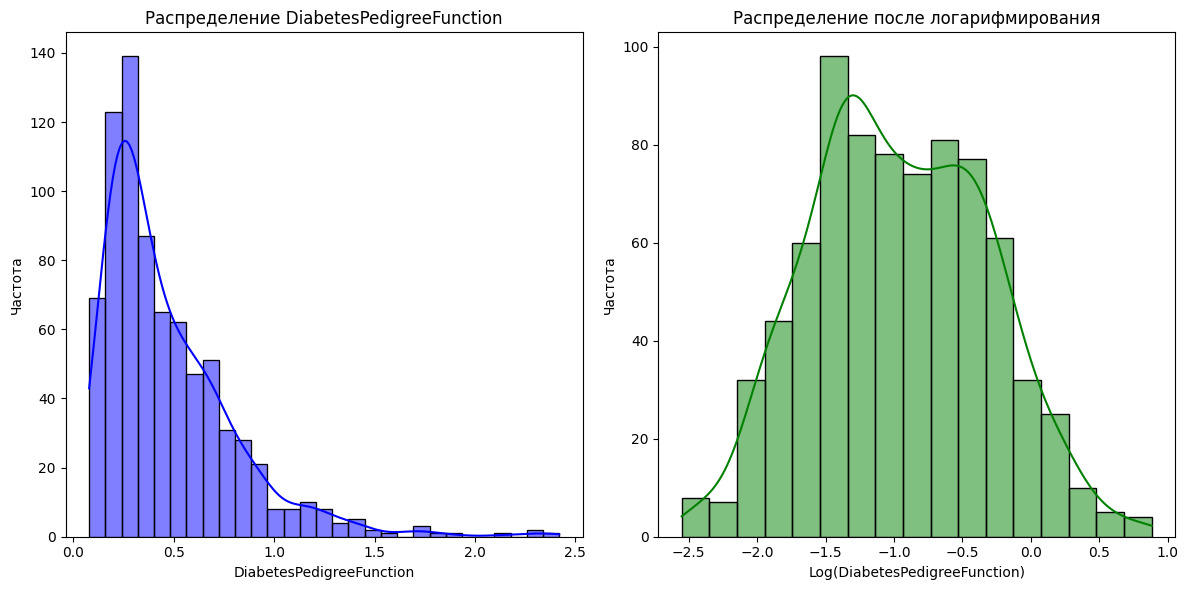

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Логарифмируем признак DiabetesPedigreeFunction
log_diabetes_pedigree = np.log(diabetes_filled['DiabetesPedigreeFunction'])

# Создаём графики
plt.figure(figsize=(12, 6))

# Гистограмма для исходных данных
plt.subplot(1, 2, 1)
sns.histplot(diabetes_filled['DiabetesPedigreeFunction'], kde=True, color='blue')
plt.title('Распределение DiabetesPedigreeFunction')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Частота')

# Гистограмма для логарифмированных данных
plt.subplot(1, 2, 2)
sns.histplot(log_diabetes_pedigree, kde=True, color='green')
plt.title('Распределение после логарифмирования')
plt.xlabel('Log(DiabetesPedigreeFunction)')
plt.ylabel('Частота')

# Отображаем графики
plt.tight_layout()
plt.show()